Cell ini digunakan untuk mengimpor library yang dibutuhkan dalam proses analisis regresi, meliputi pengolahan data, pembagian dataset, pembangunan model ensemble, serta evaluasi performa model menggunakan metrik regresi.

In [ ]:
# Cell 0 - Import Library
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Pada cell ini dataset penjualan tiket pesawat dibaca dari file CSV. Beberapa baris awal data ditampilkan untuk memastikan bahwa dataset berhasil dimuat dengan benar dan dapat digunakan pada tahap selanjutnya.

In [ ]:
# Cell 1 - Load Dataset
df = pd.read_csv("penjualan_tiket_pesawat.csv")
df.head()


,Transaction_ID,City,Gender,Date,Ticket_Quantity,Ticket_Price,Airline,Payment_Method,Total
0,1,Medan,Female,2024-03-25,5,1340246.0,Garuda,E-Wallet,6701230.0
1,2,Surabaya,Female,2024-02-15,4,1935645.0,Garuda,Transfer Bank,7742580.0
2,3,Medan,Female,2024-01-24,4,949000.0,Citilink,Transfer Bank,3796000.0
3,4,Medan,Female,2024-01-05,5,1506013.0,Lion Air,E-Wallet,7530065.0
4,5,Jakarta,Male,2024-01-30,3,842715.0,Lion Air,E-Wallet,2528145.0


Cell ini bertujuan untuk melihat struktur dataset, jumlah kolom, serta tipe data dari setiap variabel. Tahap ini penting untuk memahami karakteristik data sebelum dilakukan preprocessing dan pemodelan.

In [ ]:
# Cell 2 - Cek struktur data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   500 non-null    int64  
 1   City             500 non-null    object 
 2   Gender           500 non-null    object 
 3   Date             500 non-null    object 
 4   Ticket_Quantity  500 non-null    int64  
 5   Ticket_Price     500 non-null    float64
 6   Airline          500 non-null    object 
 7   Payment_Method   500 non-null    object 
 8   Total            500 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


Pada cell ini ditentukan variabel target dan fitur. Target regresi yang digunakan adalah Total, sedangkan kolom seperti ID transaksi dan tanggal dihapus dari fitur karena tidak memiliki pengaruh langsung terhadap nilai prediksi.

In [ ]:
# Cell 3 - Target dan fitur
y = df["Total"]

X = df.drop(columns=[
    "Transaction_ID",
    "Date",
    "Total"
])


Cell ini digunakan untuk mengubah data bertipe kategorikal menjadi bentuk numerik menggunakan Label Encoding. Proses ini diperlukan agar seluruh fitur dapat diproses oleh model Random Forest Regressor.

In [ ]:
# Cell 4 - Encoding
encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = encoder.fit_transform(X[col])


Dataset dibagi menjadi data latih dan data uji dengan perbandingan 80% dan 20%. Pembagian ini bertujuan untuk menguji kemampuan model dalam memprediksi nilai total penjualan pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Cell 5 - Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Cell ini digunakan untuk membangun dan melatih model Random Forest Regressor. Model ini merupakan metode ensemble yang menggabungkan banyak decision tree untuk menghasilkan prediksi yang lebih stabil dan akurat dibandingkan decision tree tunggal.

In [ ]:
# Cell 6 - Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Pada cell ini performa model dievaluasi menggunakan metrik MAE, RMSE, dan R². Evaluasi ini digunakan untuk mengukur tingkat kesalahan prediksi serta kemampuan model dalam menjelaskan variasi nilai total penjualan.

In [ ]:
# Cell 7 - Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 40560.25184999999
RMSE: 64752.69728464878
R²  : 0.9993042595374915


Cell ini menampilkan tingkat kepentingan masing-masing fitur terhadap model. Feature importance merupakan salah satu keunggulan metode ensemble berbasis pohon, karena dapat membantu memahami fitur mana yang paling berpengaruh terhadap prediksi total penjualan.

In [ ]:
# Cell 8 - Feature Importance
importance_df = pd.DataFrame({
    "Fitur": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df


,Fitur,Importance
2,Ticket_Quantity,0.576364
3,Ticket_Price,0.422768
0,City,0.000267
5,Payment_Method,0.000257
4,Airline,0.000177
1,Gender,0.000168


Visualisasi utama untuk regresi

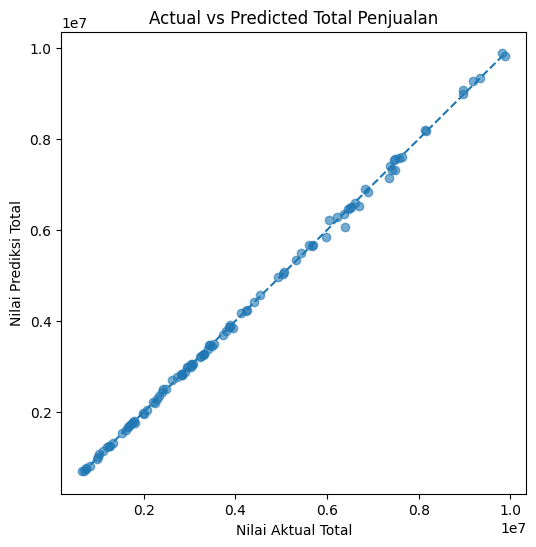

In [ ]:
# Cell 9 - Visualisasi Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Nilai Aktual Total")
plt.ylabel("Nilai Prediksi Total")
plt.title("Actual vs Predicted Total Penjualan")
plt.show()


Visualisasi Feature Importance (Grafik)

Grafik ini menunjukkan tingkat pengaruh masing-masing fitur terhadap prediksi total penjualan. Fitur dengan nilai importance lebih tinggi memiliki kontribusi yang lebih besar dalam menentukan hasil prediksi.

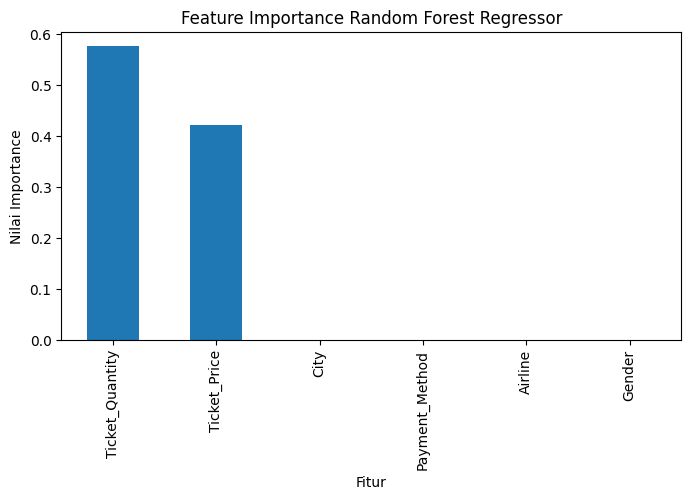

In [ ]:
# Cell 10 - Visualisasi Feature Importance
importance_df.plot(
    x="Fitur",
    y="Importance",
    kind="bar",
    figsize=(8, 4),
    legend=False
)

plt.ylabel("Nilai Importance")
plt.title("Feature Importance Random Forest Regressor")
plt.show()


Visualisasi residual digunakan untuk melihat sebaran kesalahan prediksi model. Distribusi error yang mendekati nol dan simetris menunjukkan bahwa model regresi bekerja dengan baik.

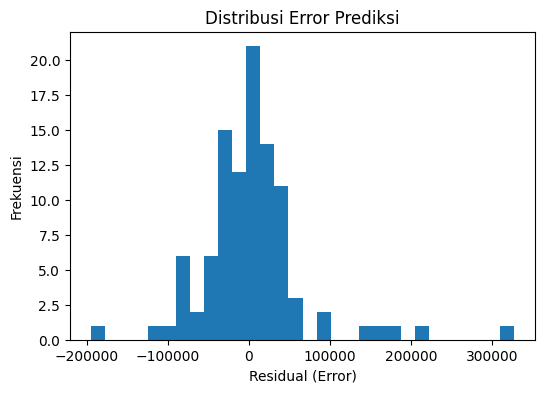

In [ ]:
# Cell 11 - Distribusi Error (Residual)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual (Error)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Error Prediksi")
plt.show()


Berdasarkan hasil evaluasi model Random Forest Regressor, diperoleh nilai
Mean Absolute Error (MAE) sebesar 40.560 dan Root Mean Squared Error (RMSE)
sebesar 64.753. Nilai error tersebut relatif kecil dibandingkan skala nilai
total penjualan tiket, sehingga menunjukkan bahwa prediksi model memiliki
tingkat kesalahan yang rendah.

Selain itu, nilai koefisien determinasi (R²) sebesar 0.9993 menunjukkan bahwa
model mampu menjelaskan sekitar 99.93% variasi data total penjualan tiket
pesawat. Hal ini mengindikasikan bahwa hubungan antara fitur input dan variabel
target berhasil dipelajari dengan sangat baik oleh model.

Dengan demikian, model Random Forest Regressor dapat dikatakan memiliki
performa yang sangat baik dan andal dalam memprediksi total penjualan tiket
pesawat. Model ini layak digunakan sebagai alat bantu analisis dan pengambilan
keputusan, terutama dalam perencanaan dan evaluasi strategi penjualan.
